<h1 style="font-size:3rem;color:orange;">Exploring Data</h1>

In [1]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [44]:
math_df = pd.read_csv('../student_data/student-mat.csv')

In [49]:
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [76]:
print(f"Amount of students by amount of factors/attributes: {math_df.shape}\n")
print(f"List of factors: {math_df.columns}")

Amount of students by amount of factors/attributes: (395, 33)

List of factors: Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [77]:
# check if there are any null values anywhere in the dataframe
print("All cells have a value!") if math_df.isnull().sum().sum() == 0 else print(math_df.isnull().sum())

All cells have a value!


In [78]:
# G1 and G2 are good indicators of what G3 may be, may drop them later idk
math_df.loc[:, ["G1", "G2", "G3"]].sample(10)

,G1,G2,G3
363,16,15,15
167,14,15,16
130,12,0,0
97,8,9,10
304,15,14,13
373,6,5,5
246,12,12,13
24,10,9,8
386,6,5,6
379,10,10,10


In [82]:
math_df.drop(columns=["G1", "G2", "G3"]).head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [114]:
math_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


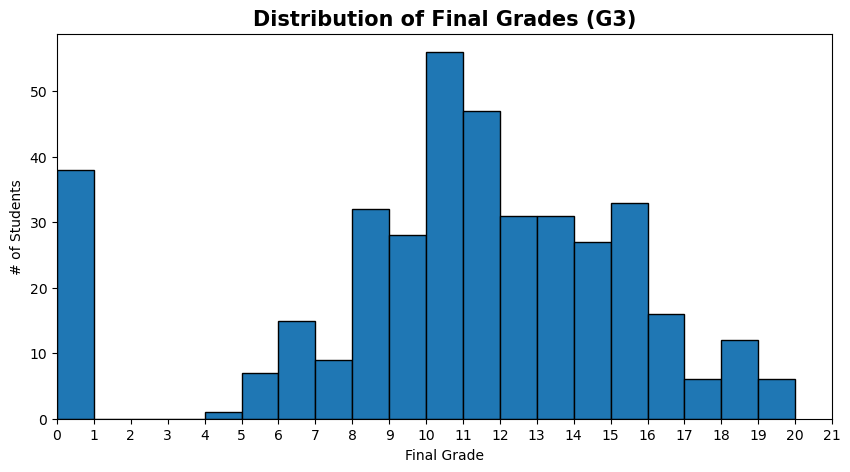

In [100]:
# Check target distribution (G3)
plt.figure(figsize=(10, 5))
bins = np.arange(0, 21, 1) 
plt.hist(math_df['G3'], bins=bins, edgecolor='black')
plt.xlim(0, 21)
plt.title('Distribution of Final Grades (G3)', fontdict={'fontweight': 'bold', 'fontsize': 15})
plt.xlabel('Final Grade')
plt.ylabel('# of Students')
plt.xticks(range(0, 22))
plt.show()

In [110]:
math_df.loc[math_df['G3'] >= 19, ['G3']]

,G3
8,19
47,20
110,19
113,19
286,19
374,19


In [113]:
math_df['Mjob'].head(10)

0     at_home
1     at_home
2     at_home
3      health
4       other
5    services
6       other
7       other
8    services
9       other
Name: Mjob, dtype: object

In [119]:
math_df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64